In [1]:
import torch 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# creating some data to train Linear Regression 
x = torch.tensor(np.arange(10), dtype = torch.float32)
y = x*5 + 10 + torch.randint(low = -5, high = 5, size = (10,), dtype = torch.float32)
print(x)
print(y)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([ 8., 10., 21., 20., 32., 32., 35., 46., 46., 53.])


<AxesSubplot:>

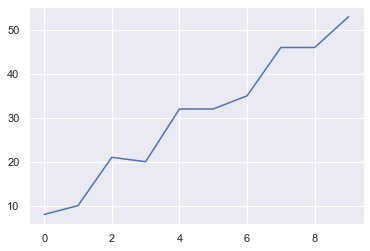

In [7]:
sns.set()
sns.lineplot(x = x, y = y)

In [8]:
# initializing weights
# we have only one feature, so we need to find two coefficients: slope and intercept 
# let's initialize them as zeros 

w = torch.zeros(2, dtype = torch.float16, )
print(w)

tensor([0., 0.], dtype=torch.float16)


In [9]:
# functions
def predict(w, x):
    y_pred = w[0]*x + w[1]
    return y_pred 

def mseerror(y, y_pred):
    loss_val = ((y_pred - y)**2).mean()
    return loss_val 

# derivative from mse with respect to slope: 2x*(y - y_pred)
def beta1gradient(x, y, y_pred):
    direction = np.dot(2*x, y_pred - y).mean()
    return direction 
# derivative from mse with respect to intercept: 2x*(y - y_pred)
def beta0gradient(x, y, y_pred):
    direction = np.dot(2, y_pred - y).mean()
    return direction

In [10]:
# let's check our predictions before training 
y_pred = predict(w, x)
error = mseerror(y, y_pred)
print(error)

tensor(1131.9000)


<AxesSubplot:>

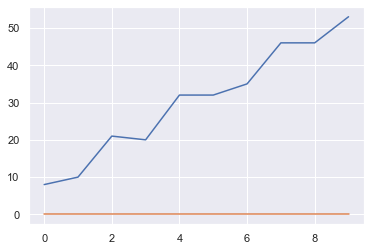

In [11]:
sns.set()
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)

In [12]:
#training 
#first let's train our model with a stopping criteria as numbers of steps 
learning_rait = 0.0006 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float16)
for step in range(number_of_steps):
    y_pred = predict(w, x)
    beta1 = beta1gradient(x, y, y_pred)
    beta0 = beta0gradient(x, y, y_pred)
    w -= learning_rait*torch.tensor([beta1,beta0]) 
    error = mseerror(y, y_pred)
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1131.9000244140625, weights = tensor([2.1328, 0.0363], dtype=torch.float16)
step №1: loss = 502.0381774902344, weights = tensor([3.5332, 0.0612], dtype=torch.float16)
step №2: loss = 230.22238159179688, weights = tensor([4.4531, 0.0784], dtype=torch.float16)
step №3: loss = 112.82142639160156, weights = tensor([5.0586, 0.0906], dtype=torch.float16)
step №4: loss = 62.015830993652344, weights = tensor([5.4570, 0.0995], dtype=torch.float16)
step №5: loss = 40.045127868652344, weights = tensor([5.7188, 0.1063], dtype=torch.float16)
step №6: loss = 30.564132690429688, weights = tensor([5.8906, 0.1116], dtype=torch.float16)
step №7: loss = 26.472360610961914, weights = tensor([6.0039, 0.1160], dtype=torch.float16)
step №8: loss = 24.699848175048828, weights = tensor([6.0781, 0.1198], dtype=torch.float16)
step №9: loss = 23.934911727905273, weights = tensor([6.1250, 0.1232], dtype=torch.float16)
step №10: loss = 23.61081314086914, weights = tensor([6.1562, 0.1263], dtype=torc

step №334: loss = 20.01275634765625, weights = tensor([6.0938, 0.9307], dtype=torch.float16)
step №335: loss = 20.003238677978516, weights = tensor([6.0938, 0.9331], dtype=torch.float16)
step №336: loss = 19.993732452392578, weights = tensor([6.0898, 0.9355], dtype=torch.float16)
step №337: loss = 19.983257293701172, weights = tensor([6.0898, 0.9380], dtype=torch.float16)
step №338: loss = 19.973695755004883, weights = tensor([6.0898, 0.9404], dtype=torch.float16)
step №339: loss = 19.964139938354492, weights = tensor([6.0898, 0.9429], dtype=torch.float16)
step №340: loss = 19.954599380493164, weights = tensor([6.0898, 0.9453], dtype=torch.float16)
step №341: loss = 19.945070266723633, weights = tensor([6.0898, 0.9478], dtype=torch.float16)
step №342: loss = 19.9355525970459, weights = tensor([6.0898, 0.9502], dtype=torch.float16)
step №343: loss = 19.926044464111328, weights = tensor([6.0898, 0.9526], dtype=torch.float16)
step №344: loss = 19.916553497314453, weights = tensor([6.0898,

step №665: loss = 17.53134536743164, weights = tensor([5.9883, 1.5908], dtype=torch.float16)
step №666: loss = 17.524457931518555, weights = tensor([5.9883, 1.5928], dtype=torch.float16)
step №667: loss = 17.517581939697266, weights = tensor([5.9883, 1.5947], dtype=torch.float16)
step №668: loss = 17.51070785522461, weights = tensor([5.9883, 1.5967], dtype=torch.float16)
step №669: loss = 17.50384521484375, weights = tensor([5.9883, 1.5986], dtype=torch.float16)
step №670: loss = 17.496990203857422, weights = tensor([5.9883, 1.6006], dtype=torch.float16)
step №671: loss = 17.490140914916992, weights = tensor([5.9844, 1.6025], dtype=torch.float16)
step №672: loss = 17.482349395751953, weights = tensor([5.9844, 1.6045], dtype=torch.float16)
step №673: loss = 17.475448608398438, weights = tensor([5.9844, 1.6064], dtype=torch.float16)
step №674: loss = 17.468555450439453, weights = tensor([5.9844, 1.6084], dtype=torch.float16)
step №675: loss = 17.461666107177734, weights = tensor([5.9844,

step №994: loss = 15.357396125793457, weights = tensor([5.8867, 2.2344], dtype=torch.float16)
step №995: loss = 15.351240158081055, weights = tensor([5.8867, 2.2363], dtype=torch.float16)
step №996: loss = 15.345088005065918, weights = tensor([5.8867, 2.2383], dtype=torch.float16)
step №997: loss = 15.338948249816895, weights = tensor([5.8867, 2.2402], dtype=torch.float16)
step №998: loss = 15.33281135559082, weights = tensor([5.8867, 2.2422], dtype=torch.float16)
step №999: loss = 15.326685905456543, weights = tensor([5.8867, 2.2441], dtype=torch.float16)


Text(0.5, 1.0, 'Manually calculated derivative loss = 15.326685905456543')

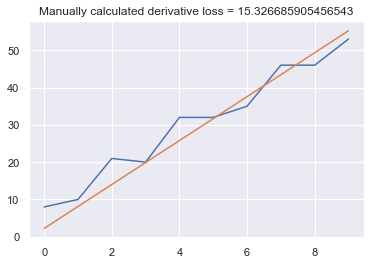

In [13]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)
plt.title(f'Manually calculated derivative loss = {error}')

In [14]:
#training 
#now stopping criteria is difference between errors  
learning_rait = 0.0006 
w = torch.zeros(2, dtype = torch.float16)
y_pred = predict(w, x)
previous_error = mseerror(y, y_pred)
beta1 = beta1gradient(x, y, y_pred)
beta0 = beta0gradient(x, y, y_pred)
w -= learning_rait*torch.tensor([beta1,beta0]) 
error = mseerror(y, y_pred)
y_pred = predict(w, x)
beta1 = beta1gradient(x, y, y_pred)
beta0 = beta0gradient(x, y, y_pred)
w -= learning_rait*torch.tensor([beta1,beta0]) 
previous_error = error
error = mseerror(y, y_pred)
while previous_error - error > 0.0000000005:
    y_pred = predict(w, x)
    beta1 = beta1gradient(x, y, y_pred)
    beta0 = beta0gradient(x, y, y_pred)
    w -= learning_rait*torch.tensor([beta1,beta0]) 
    previous_error = error 
    error = mseerror(y, y_pred)
    print(f'did one more step, loss reduced by {previous_error - error}')

did one more step, loss reduced by 271.8157958984375
did one more step, loss reduced by 117.40095520019531
did one more step, loss reduced by 50.80559539794922
did one more step, loss reduced by 21.970703125
did one more step, loss reduced by 9.480995178222656
did one more step, loss reduced by 4.091772079467773
did one more step, loss reduced by 1.772512435913086
did one more step, loss reduced by 0.7649364471435547
did one more step, loss reduced by 0.3240985870361328
did one more step, loss reduced by 0.14899253845214844
did one more step, loss reduced by 0.06864166259765625
did one more step, loss reduced by 0.035125732421875
did one more step, loss reduced by 0.02301025390625
did one more step, loss reduced by 0.0185699462890625
did one more step, loss reduced by 0.013818740844726562
did one more step, loss reduced by 0.01274871826171875
did one more step, loss reduced by 0.011852264404296875
did one more step, loss reduced by 0.011837005615234375
did one more step, loss reduced b

did one more step, loss reduced by 0.00736236572265625
did one more step, loss reduced by 0.00734710693359375
did one more step, loss reduced by 0.008298873901367188
did one more step, loss reduced by 0.0074024200439453125
did one more step, loss reduced by 0.007396697998046875
did one more step, loss reduced by 0.00739288330078125
did one more step, loss reduced by 0.007381439208984375
did one more step, loss reduced by 0.0073719024658203125
did one more step, loss reduced by 0.0073680877685546875
did one more step, loss reduced by 0.00736236572265625
did one more step, loss reduced by 0.007350921630859375
did one more step, loss reduced by 0.007343292236328125
did one more step, loss reduced by 0.0073337554931640625
did one more step, loss reduced by 0.00733184814453125
did one more step, loss reduced by 0.0082244873046875
did one more step, loss reduced by 0.0073833465576171875
did one more step, loss reduced by 0.0073757171630859375
did one more step, loss reduced by 0.007364273071

did one more step, loss reduced by 0.0063686370849609375
did one more step, loss reduced by 0.006366729736328125
did one more step, loss reduced by 0.0063533782958984375
did one more step, loss reduced by 0.006350517272949219
did one more step, loss reduced by 0.006339073181152344
did one more step, loss reduced by 0.006335258483886719
did one more step, loss reduced by 0.0063228607177734375
did one more step, loss reduced by 0.006319999694824219
did one more step, loss reduced by 0.006308555603027344
did one more step, loss reduced by 0.006304740905761719
did one more step, loss reduced by 0.0062923431396484375
did one more step, loss reduced by 0.006290435791015625
did one more step, loss reduced by 0.00724029541015625
did one more step, loss reduced by 0.006342887878417969
did one more step, loss reduced by 0.0063304901123046875
did one more step, loss reduced by 0.006327629089355469
did one more step, loss reduced by 0.006316184997558594
did one more step, loss reduced by 0.0063123

did one more step, loss reduced by 0.005228996276855469
did one more step, loss reduced by 0.0052165985107421875
did one more step, loss reduced by 0.005214691162109375
did one more step, loss reduced by 0.0052013397216796875
did one more step, loss reduced by 0.005198478698730469
did one more step, loss reduced by 0.0061492919921875
did one more step, loss reduced by 0.005251884460449219
did one more step, loss reduced by 0.005240440368652344
did one more step, loss reduced by 0.005236625671386719
did one more step, loss reduced by 0.0052242279052734375
did one more step, loss reduced by 0.005222320556640625
did one more step, loss reduced by 0.0052089691162109375
did one more step, loss reduced by 0.005206108093261719
did one more step, loss reduced by 0.005194664001464844
did one more step, loss reduced by 0.005190849304199219
did one more step, loss reduced by 0.0051784515380859375
did one more step, loss reduced by 0.005175590515136719
did one more step, loss reduced by 0.00608062

did one more step, loss reduced by 0.00421905517578125
did one more step, loss reduced by 0.005152702331542969
did one more step, loss reduced by 0.0042724609375
did one more step, loss reduced by 0.0042667388916015625
did one more step, loss reduced by 0.0042572021484375
did one more step, loss reduced by 0.0042514801025390625
did one more step, loss reduced by 0.004241943359375
did one more step, loss reduced by 0.004235267639160156
did one more step, loss reduced by 0.0042266845703125
did one more step, loss reduced by 0.0042209625244140625
did one more step, loss reduced by 0.00421142578125
did one more step, loss reduced by 0.004204750061035156
did one more step, loss reduced by 0.0041961669921875
did one more step, loss reduced by 0.0041904449462890625
did one more step, loss reduced by 0.0051441192626953125
did one more step, loss reduced by 0.004242897033691406
did one more step, loss reduced by 0.00423431396484375
did one more step, loss reduced by 0.0042285919189453125
did on

Text(0.5, 1.0, 'Manually calculated derivative. Slope = 5.60546875, intercept = 4.0, loss = 10.619758605957031')

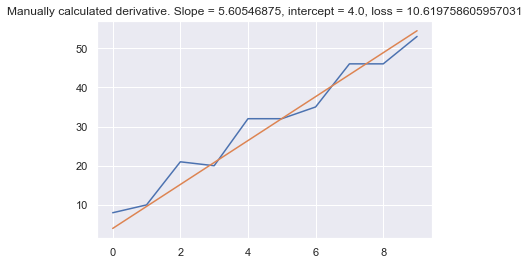

In [15]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)
plt.title(f'Manually calculated derivative. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [16]:
#now let's use PyTorch gradient calculation. We don't need our gradient function. 
learning_rait = 0.0006 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float16, requires_grad = True) #it should be mentioned that in the future 
                                                            #you will need a derivative with respect to these values
for step in range(number_of_steps):
    y_pred = predict(w, x)
    error = mseerror(y, y_pred)
    error.backward()
    with torch.no_grad():
        w -= learning_rait*w.grad
    w.grad.zero_()
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1131.9000244140625, weights = tensor([0.2133, 0.0363], dtype=torch.float16, requires_grad=True)
step №1: loss = 1055.273193359375, weights = tensor([0.4189, 0.0715], dtype=torch.float16, requires_grad=True)
step №2: loss = 983.9490356445312, weights = tensor([0.6177, 0.1055], dtype=torch.float16, requires_grad=True)
step №3: loss = 917.4542236328125, weights = tensor([0.8091, 0.1384], dtype=torch.float16, requires_grad=True)
step №4: loss = 855.6471557617188, weights = tensor([0.9941, 0.1702], dtype=torch.float16, requires_grad=True)
step №5: loss = 797.9888916015625, weights = tensor([1.1729, 0.2009], dtype=torch.float16, requires_grad=True)
step №6: loss = 744.2576904296875, weights = tensor([1.3447, 0.2307], dtype=torch.float16, requires_grad=True)
step №7: loss = 694.3846435546875, weights = tensor([1.5107, 0.2595], dtype=torch.float16, requires_grad=True)
step №8: loss = 647.8980102539062, weights = tensor([1.6709, 0.2874], dtype=torch.float16, requires_grad=True)


step №313: loss = 17.342390060424805, weights = tensor([5.9844, 1.6445], dtype=torch.float16, requires_grad=True)
step №314: loss = 17.335647583007812, weights = tensor([5.9844, 1.6465], dtype=torch.float16, requires_grad=True)
step №315: loss = 17.328907012939453, weights = tensor([5.9844, 1.6484], dtype=torch.float16, requires_grad=True)
step №316: loss = 17.322179794311523, weights = tensor([5.9844, 1.6504], dtype=torch.float16, requires_grad=True)
step №317: loss = 17.31545639038086, weights = tensor([5.9844, 1.6523], dtype=torch.float16, requires_grad=True)
step №318: loss = 17.30874252319336, weights = tensor([5.9844, 1.6543], dtype=torch.float16, requires_grad=True)
step №319: loss = 17.302034378051758, weights = tensor([5.9844, 1.6562], dtype=torch.float16, requires_grad=True)
step №320: loss = 17.295337677001953, weights = tensor([5.9844, 1.6582], dtype=torch.float16, requires_grad=True)
step №321: loss = 17.28864288330078, weights = tensor([5.9844, 1.6602], dtype=torch.float1

step №663: loss = 15.143574714660645, weights = tensor([5.9219, 2.3281], dtype=torch.float16, requires_grad=True)
step №664: loss = 15.138402938842773, weights = tensor([5.9219, 2.3301], dtype=torch.float16, requires_grad=True)
step №665: loss = 15.133234977722168, weights = tensor([5.9219, 2.3320], dtype=torch.float16, requires_grad=True)
step №666: loss = 15.128079414367676, weights = tensor([5.9219, 2.3340], dtype=torch.float16, requires_grad=True)
step №667: loss = 15.122926712036133, weights = tensor([5.9219, 2.3359], dtype=torch.float16, requires_grad=True)
step №668: loss = 15.117785453796387, weights = tensor([5.9219, 2.3379], dtype=torch.float16, requires_grad=True)
step №669: loss = 15.112648010253906, weights = tensor([5.9219, 2.3398], dtype=torch.float16, requires_grad=True)
step №670: loss = 15.107522964477539, weights = tensor([5.9219, 2.3418], dtype=torch.float16, requires_grad=True)
step №671: loss = 15.102399826049805, weights = tensor([5.9219, 2.3438], dtype=torch.flo

Text(0.5, 1.0, 'Derivative is calculated by Pytorch. Slope = 5.8203125, intercept = 2.984375, loss = 13.215726852416992')

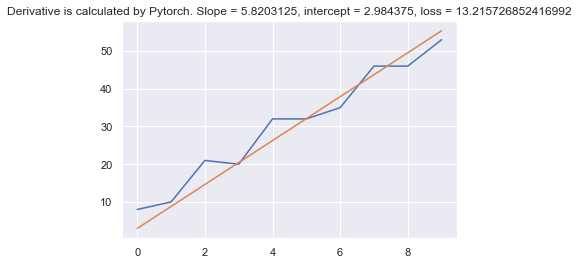

In [17]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred.detach().numpy())
plt.title(f'Derivative is calculated by Pytorch. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [18]:
#let's also use mse error and optimizer which are provided by Pytorch library  
import torch.nn as nn 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float32, requires_grad = True)
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = 0.0006)
for step in range(number_of_steps):
    y_pred = predict(w, x)
    error = loss(y, y_pred)
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1131.9000244140625, weights = tensor([0.2132, 0.0364], requires_grad=True)
step №1: loss = 1055.278076171875, weights = tensor([0.4190, 0.0715], requires_grad=True)
step №2: loss = 983.9343872070312, weights = tensor([0.6175, 0.1055], requires_grad=True)
step №3: loss = 917.5050048828125, weights = tensor([0.8091, 0.1384], requires_grad=True)
step №4: loss = 855.6515502929688, weights = tensor([0.9939, 0.1703], requires_grad=True)
step №5: loss = 798.0588989257812, weights = tensor([1.1722, 0.2010], requires_grad=True)
step №6: loss = 744.4332885742188, weights = tensor([1.3443, 0.2308], requires_grad=True)
step №7: loss = 694.50146484375, weights = tensor([1.5103, 0.2597], requires_grad=True)
step №8: loss = 648.0089721679688, weights = tensor([1.6705, 0.2876], requires_grad=True)
step №9: loss = 604.7190551757812, weights = tensor([1.8250, 0.3145], requires_grad=True)
step №10: loss = 564.4107055664062, weights = tensor([1.9742, 0.3407], requires_grad=True)
step №11: 

step №313: loss = 17.305004119873047, weights = tensor([5.9833, 1.6554], requires_grad=True)
step №314: loss = 17.29771614074707, weights = tensor([5.9829, 1.6574], requires_grad=True)
step №315: loss = 17.290443420410156, weights = tensor([5.9826, 1.6595], requires_grad=True)
step №316: loss = 17.28316879272461, weights = tensor([5.9823, 1.6616], requires_grad=True)
step №317: loss = 17.275907516479492, weights = tensor([5.9819, 1.6636], requires_grad=True)
step №318: loss = 17.268638610839844, weights = tensor([5.9816, 1.6657], requires_grad=True)
step №319: loss = 17.261390686035156, weights = tensor([5.9813, 1.6677], requires_grad=True)
step №320: loss = 17.254135131835938, weights = tensor([5.9810, 1.6698], requires_grad=True)
step №321: loss = 17.246891021728516, weights = tensor([5.9806, 1.6719], requires_grad=True)
step №322: loss = 17.239648818969727, weights = tensor([5.9803, 1.6739], requires_grad=True)
step №323: loss = 17.232412338256836, weights = tensor([5.9800, 1.6760],

step №644: loss = 15.145413398742676, weights = tensor([5.8803, 2.3016], requires_grad=True)
step №645: loss = 15.139595031738281, weights = tensor([5.8800, 2.3034], requires_grad=True)
step №646: loss = 15.13377571105957, weights = tensor([5.8797, 2.3053], requires_grad=True)
step №647: loss = 15.127970695495605, weights = tensor([5.8794, 2.3071], requires_grad=True)
step №648: loss = 15.122163772583008, weights = tensor([5.8791, 2.3090], requires_grad=True)
step №649: loss = 15.116361618041992, weights = tensor([5.8788, 2.3108], requires_grad=True)
step №650: loss = 15.110562324523926, weights = tensor([5.8785, 2.3127], requires_grad=True)
step №651: loss = 15.104769706726074, weights = tensor([5.8782, 2.3145], requires_grad=True)
step №652: loss = 15.098978996276855, weights = tensor([5.8779, 2.3163], requires_grad=True)
step №653: loss = 15.09319019317627, weights = tensor([5.8776, 2.3182], requires_grad=True)
step №654: loss = 15.087408065795898, weights = tensor([5.8773, 2.3200],

step №998: loss = 13.313690185546875, weights = tensor([5.7821, 2.9170], requires_grad=True)
step №999: loss = 13.309114456176758, weights = tensor([5.7819, 2.9187], requires_grad=True)


Text(0.5, 1.0, 'Everything is calculated by Pytorch. Slope = 5.781870365142822, intercept = 2.9186758995056152, loss = 13.309114456176758')

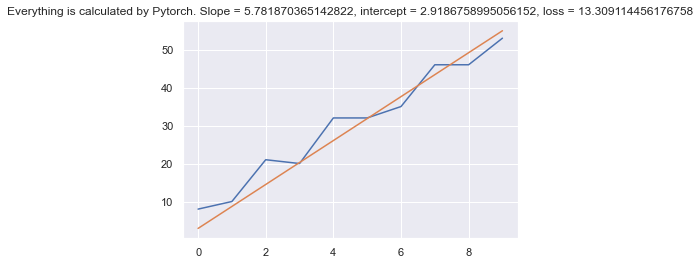

In [19]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred.detach().numpy())
plt.title(f'Everything is calculated by Pytorch. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [20]:
#it's time to replace prediction calculations too
x = x.tolist()
y = y.tolist()
x = torch.tensor([[item] for item in x], dtype = torch.float32)
y = torch.tensor([[item] for item in y], dtype = torch.float32)
model = nn.Linear(1, 1)
print(model.parameters())
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0006)
for step in range(number_of_steps):
    y_pred = model(x)
    error = loss(y, y_pred)
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'step №{step}: loss = {error}, weights = {w}')

<generator object Module.parameters at 0x7fa3d90854a0>
step №0: loss = 1173.342529296875, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №1: loss = 1093.9241943359375, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №2: loss = 1019.9765625, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №3: loss = 951.1226806640625, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №4: loss = 887.0119018554688, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №5: loss = 827.3171997070312, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №6: loss = 771.7342529296875, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №7: loss = 719.9800415039062, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №8: loss = 671.7907104492188, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №9: loss = 626.9205932617188, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №10: loss = 585.1409912109375, weights = ten

step №343: loss = 17.770116806030273, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №344: loss = 17.762523651123047, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №345: loss = 17.75493621826172, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №346: loss = 17.747346878051758, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №347: loss = 17.739768981933594, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №348: loss = 17.732189178466797, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №349: loss = 17.724620819091797, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №350: loss = 17.71705436706543, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №351: loss = 17.70949363708496, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №352: loss = 17.701936721801758, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №353: loss = 17.694387435913086, weights = tensor([5.7819, 2.9187], 

step №694: loss = 15.396444320678711, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №695: loss = 15.39045238494873, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №696: loss = 15.384466171264648, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №697: loss = 15.378491401672363, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №698: loss = 15.372512817382812, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №699: loss = 15.366543769836426, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №700: loss = 15.360575675964355, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №701: loss = 15.35461139678955, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №702: loss = 15.348650932312012, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №703: loss = 15.342697143554688, weights = tensor([5.7819, 2.9187], requires_grad=True)
step №704: loss = 15.336743354797363, weights = tensor([5.7819, 2.9187],

In [21]:
weights = []
for name, param in model.named_parameters():
    weights.append(param)

Text(0.5, 1.0, 'Now absolutely verything is calculated by Pytorch. Slope = 5.8063859939575195, intercept = 2.764946937561035, loss = 13.745951652526855')

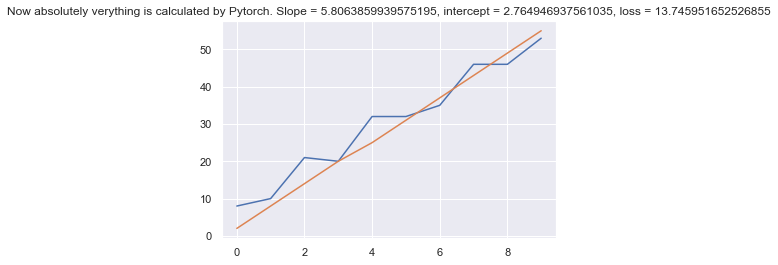

In [22]:
y_pred = model(x)
sns.lineplot(x = [int(item[0]) for item in x], y = [int(item[0]) for item in y])
sns.lineplot(x = [int(item[0]) for item in x], y = [int(item[0]) for item in y_pred])
plt.title(f'Now absolutely verything is calculated by Pytorch. Slope = {weights[0].item()}, intercept = {weights[1].item()}, loss = {error}')